Please do Problems 2.10, 2.16, 2.23, 2.27, 2.35,  and 2.36 in the Curtis textbook.

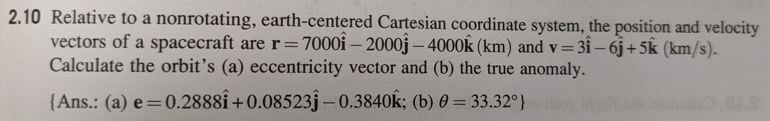

In [20]:
from sympy.vector import CoordSys3D
from sympy import *
#
#  from sympy import symbols
# from sympy import Symbol

N = CoordSys3D('N')

r_x, r_y, r_z = symbols('r_x r_y r_z')
v_x, v_y, v_z = symbols('v_x v_y v_z')
mu = Symbol('mu')

r = r_x * N.i + r_y * N.j + r_z * N.k
v = v_x * N.i + v_y * N.j + v_z * N.k

values = {
    (r_x, 7000),
    (r_y, -2000),
    (r_z, -4000),
    (v_x, 3),
    (v_y, -6),
    (v_z, 5),
    ( mu, 3.986*10**5), # in units of km^3/s^2
}

# Equation 2.28 pg 69
h_angular_momentum = r.cross(v)

# Equation 2.40, rearranged
eccentricity = v.cross(h_angular_momentum)/mu - r/r.magnitude()

# to get true enomoly we rearrange the definition of the dot product
true_anomaly = acos(r.dot(eccentricity)/(r.magnitude()*eccentricity.magnitude()))*180/pi


print("Eccentricity vector:",eccentricity.subs(values).evalf())
print("True Anomoly:", true_anomaly.subs(values).evalf(),"degrees")



Eccentricity vector: 0.288759138785968*N.i + 0.0852273007525721*N.j + (-0.383985940391494)*N.k
True Anomoly: 33.3224912554816 degrees


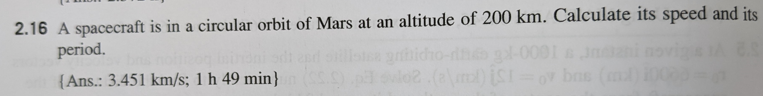

In [11]:
%reset -f
from sympy import *
# A spacecraft in a circular orbit has eccentricity 0, and ra = rp = a, the semi-major axis

mu = Symbol('mu')
r_mars = Symbol('r_mars')
alt = Symbol('alt')

values = {
    (alt, 200),
    (r_mars, 3396),
    ( mu, 4.282*10**4), # in units of km^3/s^2
}

r = alt + r_mars

# rearranging eq. 2.81 with r = a gives this equation for velocity:
velocity = (mu/r)**0.5

# equation 2.83
period = (2*pi/mu**0.5)*r**1.5

seconds_in_orbit = period.subs(values).evalf()
hours_in_orbit = floor(seconds_in_orbit/3600)
minutes_in_orbit = floor(seconds_in_orbit/60) - hours_in_orbit*60

print("Velocity: ",velocity.subs(values).evalf()," km/s")
print("Orbital period:",hours_in_orbit,"hours,",minutes_in_orbit,"minutes")


Velocity km/s:  3.45074994670155
Orbital period: 1 hours, 49 minutes


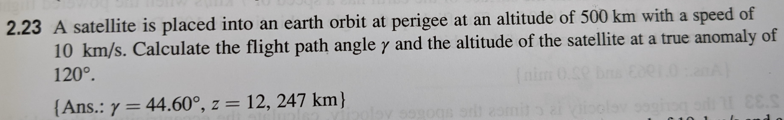

In [28]:
%reset -f
from sympy import *

mu = Symbol('mu')
r_earth = Symbol('r_earth')
r_p_altitude = Symbol('r_p_altitude')
v_p = Symbol('v_p')
r_p = Symbol('r_p')
anomaly = Symbol('anomaly')

values = {
    (r_earth, 6378),     # km
    ( mu, 3.986*10**5), # km^3/s^2
    (r_p_altitude, 500), # km
    (v_p, 10),           # km/s
    (anomaly, 120)      # degrees
}

r_p = r_p_altitude + r_earth

# First we need the specific orbital energy, since it remains constant throughout the orbit
sp_energy = (v_p**2)/2 - mu/r_p

# it is easy to calculate angular momentum give periapsis info:

h = r_p*v_p

# Rearranging eq. 2.81 we can solve for the semi-major axis a, and then solve for r_a, and e

a = -mu/(2*sp_energy)
r_a = 2*a - r_p
e = (r_a - r_p)/(r_a + r_p)

# Now we can use the orbit equation 2.45 to find r

r = (h**2)/(mu*(1 + e*cos(anomaly*pi/180)))

# and we can use this to solve for the flight path angle gamma
v_perp = h/r
v_rad = (mu/h)*e*sin(anomaly*pi/180)

flight_path_angle = atan2(v_rad,v_perp)*180/pi

# Now to subtract earth's radius to find altitude

altitude_at_anomaly = r - r_earth

print("Altitude at anomaly",anomaly.subs(values),"degrees:",altitude_at_anomaly.subs(values).evalf(),"Km")
print("Flight path angle:",flight_path_angle.subs(values).evalf(),"degrees")

Altitude at anomaly 120 degrees: 12246.7574803150 Km
Flight path angle: 44.5973152331288 degrees


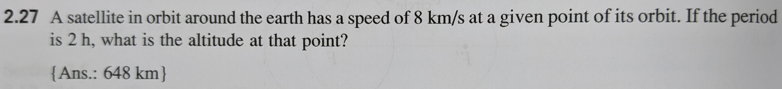

In [21]:
%reset -f
from sympy import *

mu = Symbol('mu')
r_earth = Symbol('r_earth')
period = Symbol('period')
v = Symbol('v')

values = {
    (r_earth, 6378),     # km
    ( mu, 3.986*10**5), # km^3/s^2
    (period, 2*3600), # s
    (v, 8),           # km/s
}

# Using eq. 2.83 we can solve for semi-major axis a

a = ((period*mu**0.5)/(2*pi))**(2/3)

# Then using eq. 2.81 rearranged we can solve for r

r = 2/((1/a)+(v**2)/mu)

# Then of course remove the earths radius

r_altitude = r - r_earth

print("Altitude:",r_altitude.subs(values).evalf(),"Km")

Altitude: 648.248314965440 Km


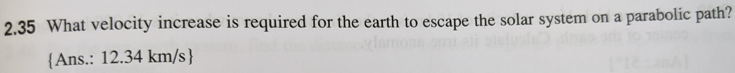

In [25]:
%reset -f
from sympy import *

mu = Symbol('mu')
v_earth = Symbol('v_earth')
r_earth = Symbol('r_earth')

values = {
    (v_earth, 29.72),     # km/s
    ( mu, 1.327e11), # km^3/s^2 of the sun
    (r_earth, 149598023), # km
}

# we can rearrange eq. 2.90 to solve for our needed velocity, assuming earth's orbital radius is constant


v = (2*mu/r_earth)**0.5

# Then we just subtract the earths current speed

v_increase = v - v_earth

print("Velocity increase:",v_increase.subs(values).evalf(),"Km/s")

# (we could just say v_earth*(1 - sqrt(2)) for this assumption!)
v_increase_rough = (2**0.5-1)*v_earth
print("Velocity increase rough estimate:",v_increase_rough.subs(values).evalf(),"Km/s")

Velocity increase: 12.3999194695071 Km/s
Velocity increase rough estimate: 12.3104270737284 Km/s


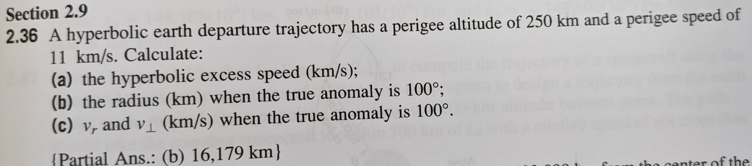

In [29]:
%reset -f
from sympy import *

mu = Symbol('mu')
r_earth = Symbol('r_earth')
r_p_altitude = Symbol('r_p_altitude')
v_p = Symbol('v_p')
r_p = Symbol('r_p')
anomaly = Symbol('anomaly')

values = {
    (r_earth, 6378),     # km
    ( mu, 3.986*10**5), # km^3/s^2
    (r_p_altitude, 250), # km
    (v_p, 11),           # km/s
    (anomaly, 100)      # degrees
}

r_p = r_p_altitude + r_earth

# First we need the specific orbital energy
sp_energy = (v_p**2)/2 - mu/r_p

# it is easy to calculate angular momentum give periapsis info:
h = r_p*v_p

# Rearranging eq. 2.111 we can solve for the semi-major axis a, and then solve for r_a, and e
a = mu/(2*sp_energy)

# (a) hyperbolic excess speed, equation 2.112
v_inf = (mu/a)**0.5

# we will calculate e by rearranging eq. 2.103
e = (1 + (h**2)/(a*mu))**0.5

# (b) Now we can use the orbit equation 2.45 to find r
r = (h**2)/(mu*(1 + e*cos(anomaly*pi/180)))

# (c) v_perp and v_rad are given by eq 2.31 and eq. 2.49

v_perp = h/r
v_rad = (mu/h)*e*sin(anomaly*pi/180)

# output results for a, b, and c

print("(a)")
print("Hyperbolic excess speed:",v_inf.subs(values).evalf(),"Km/s")


print()
print("(b)")
print("Radius at anomoly", anomaly.subs(values), "degrees:",r.subs(values).evalf(),"Km")

print()
print("(c)")
print("radial velocity magnitude:",v_rad.subs(values).evalf(),"Km/s")
print("perpendicular velocity magnitude:",v_perp.subs(values).evalf(),"Km/s")


(a)
Hyperbolic excess speed: 0.849935209998352 Km/s

(b)
Radius at anomoly 100 degrees: 16178.7779358510 Km

(c)
radial velocity magnitude: 5.44877969320361 Km/s
perpendicular velocity magnitude: 4.50639722537022 Km/s
